In [3]:
library(tidyverse)
library(tidytext)
library(topicmodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
load("data/dtm_fin.Rda")

In [3]:
ru_lda = LDA(dtm_fin, k = 120, 
             method="Gibbs", 
             control=list(seed = 5478,
                          alpha=0.1,
                          delta=0.5))




In [5]:
save(ru_lda, file="data/ru_lda.Rda")

## Words in topics (beta)

Few things happen here:  

- list most probable words in topics
- build topic labels from few top words
- save topic visualization for curiosity

In [4]:
# extract word probabilities in topics
ru_beta = tidy(ru_lda, matrix = "beta")

# get top 20 words per each topic
top_terms = ru_beta %>%
  group_by(topic) %>%
  top_n(20, beta) %>%
  ungroup() %>%
  arrange(topic, -beta)

In [5]:
# topic labels, top n words

n_words = 5

topic_labels = top_terms %>%
  group_by(topic) %>%
  top_n(n_words, beta) %>%
  summarise(label=paste(term, collapse=" ")) %>%
  mutate(label = paste(topic, label, sep="_"))

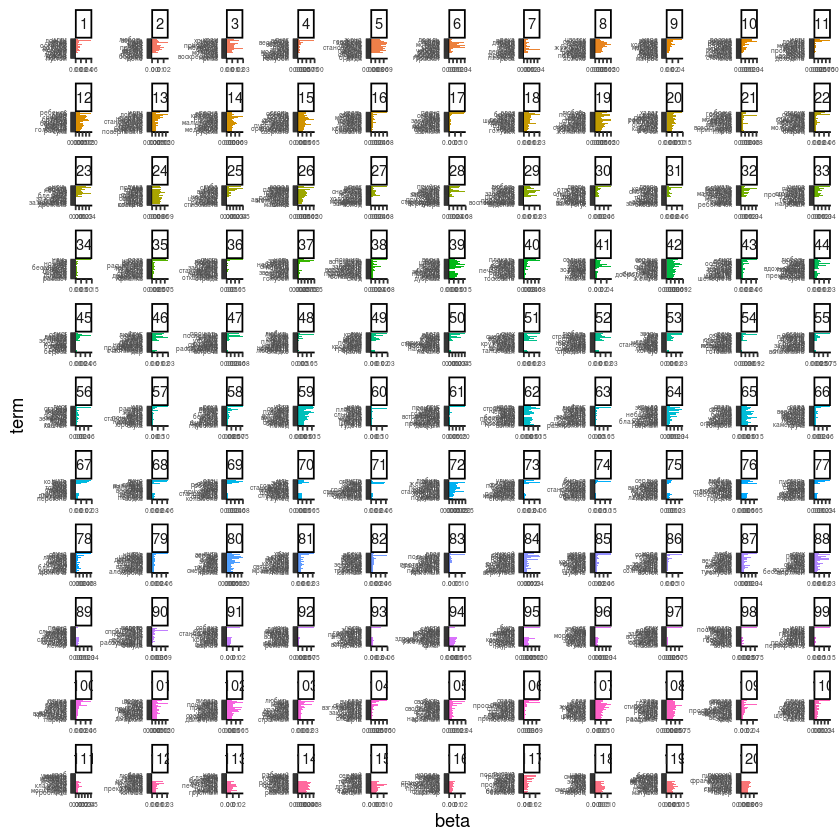

In [14]:
# plot top words per topic & save it
top_terms %>%
  mutate(term = reorder(term, beta)) %>%
  ggplot(aes(term, beta, fill = factor(topic))) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~ topic, scales = "free") +
  coord_flip() + 
  theme_classic() +
  theme(axis.text = element_text(size = 4))

ggsave("ru_topics120.png", width=20, height=14)

## Topics in documents (gamma)

- Extract probabilities of topics in documents
- Check distribution of topics over all corpus

In [6]:
ru_gamma = tidy(ru_lda, matrix = "gamma")



In [26]:
print(topic_labels)

# A tibble: 120 x 2
   topic label                                   
   <int> <chr>                                   
 1     1 1_дождь капля дождик серый небо         
 2     2 2_мир правда зло сила вера              
 3     3 3_святой христос крест церковь пречистый
 4     4 4_весна весенний солнце цветок май      
 5     5 5_здорово мужик пойти парень баба       
 6     6 6_туча буря гром гроза небо             
 7     7 7_поле лес дорога луг деревня           
 8     8 8_мед пчела запах трава пахнуть         
 9     9 9_море корабль волна вода берег         
10    10 10_русский россия москва русь слава     
# … with 110 more rows


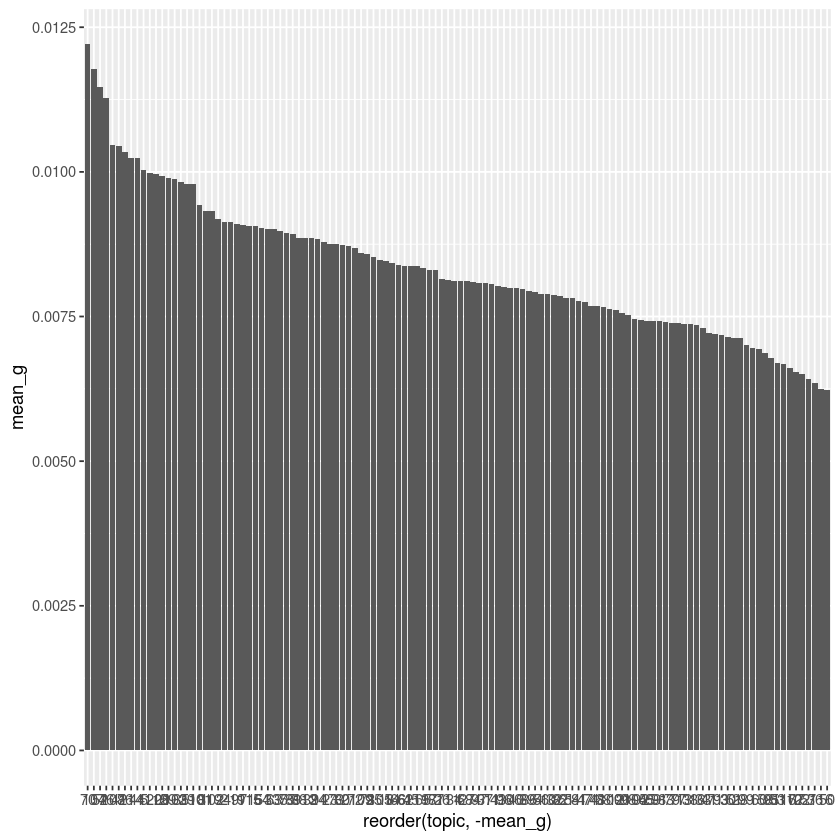

In [21]:
ru_gamma %>%
  group_by(topic) %>%
  summarise(mean_g = mean(gamma)) %>%
  arrange(-mean_g)  %>% 
  mutate(topic = as.numeric(topic))  %>% 
  ggplot(aes(reorder(topic, -mean_g), mean_g)) + geom_bar(stat="identity")



In [7]:
## save stuff for main analysis
save(topic_labels, top_terms, ru_gamma, file="data/lda_output.Rda")